In [1]:
from skimage.color import rgb2lab,deltaE_cie76
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans
from collections import Counter
import cv2
%matplotlib inline

The type of this image:  <class 'numpy.ndarray'>
The shape of the image:  (195, 259, 3)


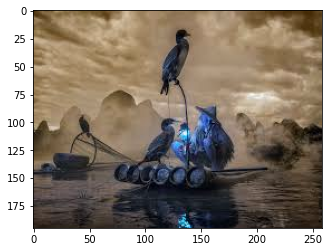

In [2]:
img = cv2.imread('image.jpg')
print("The type of this image: ",type(img))
print("The shape of the image: ",img.shape)
plt.imshow(img)

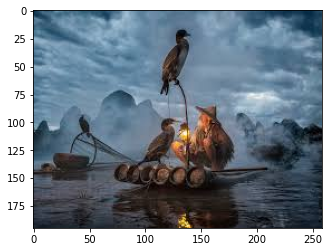

In [3]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

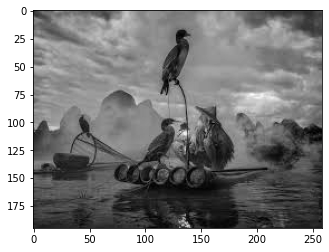

In [4]:
grayimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg,cmap='gray')

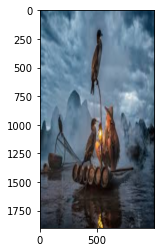

In [5]:
resizeimg = cv2.resize(img,(1000,1900))
plt.imshow(resizeimg)

In [6]:
def rgb2hex(color):
    return ("#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]),int(color[2])))

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image,no_of_colors,show_piechart):
    modified_image = cv2.resize(image,(600,400),interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
    clf = KMeans(n_clusters = no_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    orderedkeys = [center_colors[i] for i in counts.keys()]
    hexcolors = [rgb2hex(orderedkeys[i]) for i in counts.keys()]
    rgbcolors = [orderedkeys[i] for i in counts.keys()]
    if(show_piechart):
        plt.figure(figsize=(8,6))
        plt.pie(counts.values(),labels = hexcolors ,colors = hexcolors)
    return rgbcolors

In [ ]:
get_colors(get_image('IdPhoto.jpg'),8,True)

In [ ]:
imagedir = 'images'
colors = {'green':[0,128,0],'blue':[0,0,128],'yellow':[255,255,0]}
images = []
for file in os.listdir(imagedir):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(imagedir,file)))

In [ ]:
plt.figure(figsize=(20,10))
for i in range(1,len(images)):
    plt.subplot(1,len(images),i)
    plt.imshow(images[i])

In [ ]:
def match_image_by_color(images,color,thres = 50,no_of_colors = 10):
    imagecolors= get_colors(images,no_of_colors,False)
    selectcolor = rgb2lab(np.uint8(np.asarray([[color]])))
    selectedimage =False
    for i in range(no_of_colors):
        currcolor = rgb2lab(np.uint8(np.asarray([[color]])))
        diff = deltaE_cie76(selectcolor,currcolor)
        if(diff<thres):
            selectedimage=True
    return selectedimage

In [ ]:
def show_selectedimages(images,color,thres,colors_to_match):
    j=1
    for i in range(len(images)):
        selected=match_image_by_color(images[i],color,thres,colors_to_match)
        if(selected):
            plt.subplot(1,8,j)
            plt.imshow(images[i])
            j+=1

In [ ]:
plt.figure(figsize=(20,10))
show_selectedimages(images,colors['yellow'],50,5)